<a href="https://colab.research.google.com/github/CodeHunterOfficial/Practical-Time-Series-Analysis/blob/main/Time_Series_From_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка библиотек и данных

https://www.helenkapatsa.ru/vriemiennoi-riad/

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from numpy import log

import pandas as pd

import sklearn
from sklearn.metrics import mean_squared_error

import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(matplotlib.__version__)
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)
print(statsmodels.__version__)

3.2.2
1.21.6
1.3.5
1.0.2
0.12.2


In [ ]:
df = pd.read_csv('https://www.dropbox.com/s/j04e6thkqmk02z1/LPL.csv?dl=1')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,8.78,8.80,8.60,8.66,8.66,256300
1,2021-01-05,8.59,8.65,8.56,8.64,8.64,168200
2,2021-01-06,8.86,9.03,8.84,8.96,8.96,522200
3,2021-01-07,9.08,9.17,9.05,9.16,9.16,305200
4,2021-01-08,9.15,9.27,9.14,9.21,9.21,530800


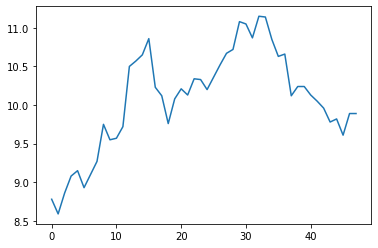

<Figure size 1800x720 with 0 Axes>

In [ ]:
plt.plot(df['Open'])
plt.figure(figsize = (25, 10))
plt.show()

## Стационарность

In [ ]:
Y = df['Open'].values
Y = log(Y)
result = adfuller(Y)
print('Коэффициент расширенного теста Дики-Фуллера: %f' % result[0])
print('Критические значения: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Коэффициент расширенного теста Дики-Фуллера: -2.160400
Критические значения: 0.220931
	1%: -3.578
	5%: -2.925
	10%: -2.601


##Модель ARIMA

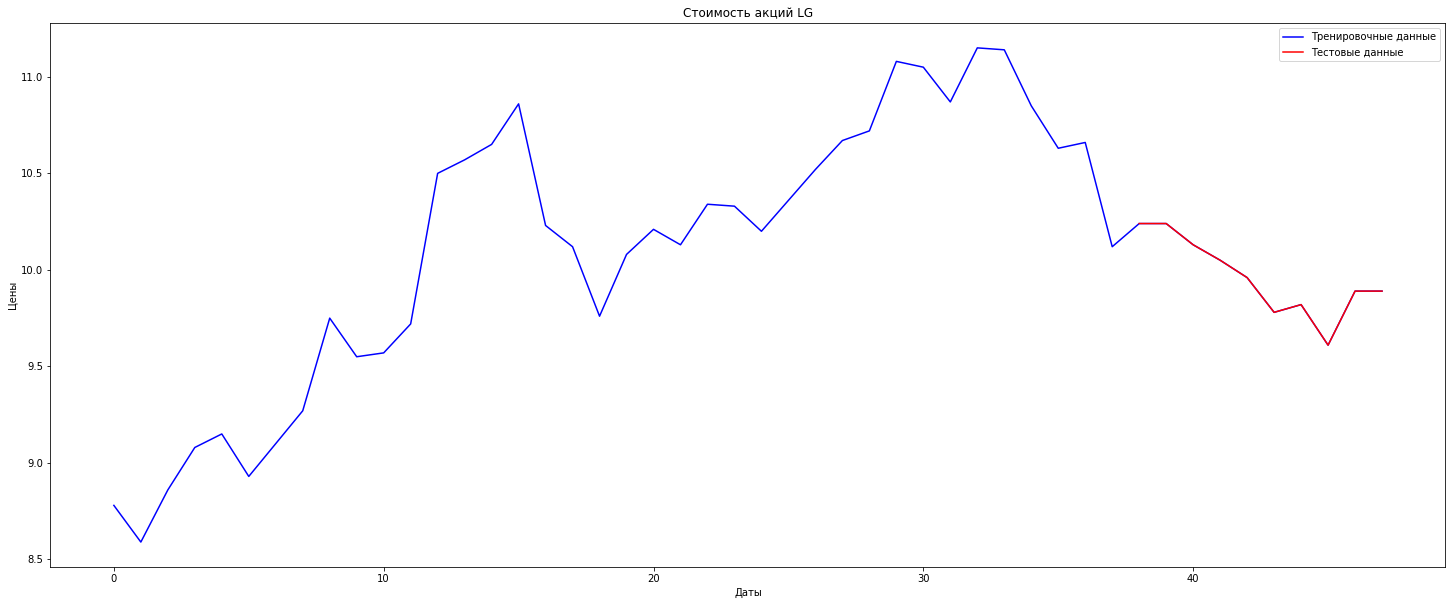

In [ ]:
train_data, test_data = df[0:int(len(df) * 0.8)], df[int(len(df) * 0.8):]
plt.figure(figsize = (25, 10))
plt.title('Стоимость акций LG') # Название графика
plt.xlabel('Даты') # Название оси X
plt.ylabel('Цены') # Название оси Y
plt.plot(df['Open'], 'blue', label = 'Тренировочные данные') # Левая синяя часть линейного графика
plt.plot(test_data['Open'], 'red', label = 'Тестовые данные') # Правая красная часть линейного графика
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order = (5, 1, 0)) # Параметризуем модель
    model_fit = model.fit(disp = 0) # Передадим обучающие данные
    output = model_fit.forecast() # Сгенерируем предсказания
    yhat = output[0] # Сделаем первое предсказание отдельной переменной
    predictions.append(yhat) # Добавим в список предсказаний первое значение
    obs = test_ar[t] # Создадим служебную переменную obs (observation)
    history.append(obs) # Пополним служебной переменной список history 

# Определим эффективность модели    
error = mean_squared_error(test_ar, predictions)
print('Тестовая среднеквадратическая ошибка: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Симметричная средняя абсолютная ошибка в процентах: %.3f' % error2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Тестовая среднеквадратическая ошибка: 0.025
Симметричная средняя абсолютная ошибка в процентах: 2.459


In [ ]:
predictions

[array([10.16718503]),
 array([10.31298615]),
 array([10.32677964]),
 array([10.16406494]),
 array([10.12449033]),
 array([9.98112588]),
 array([9.79427133]),
 array([9.84009477]),
 array([9.62444076]),
 array([9.89937338])]

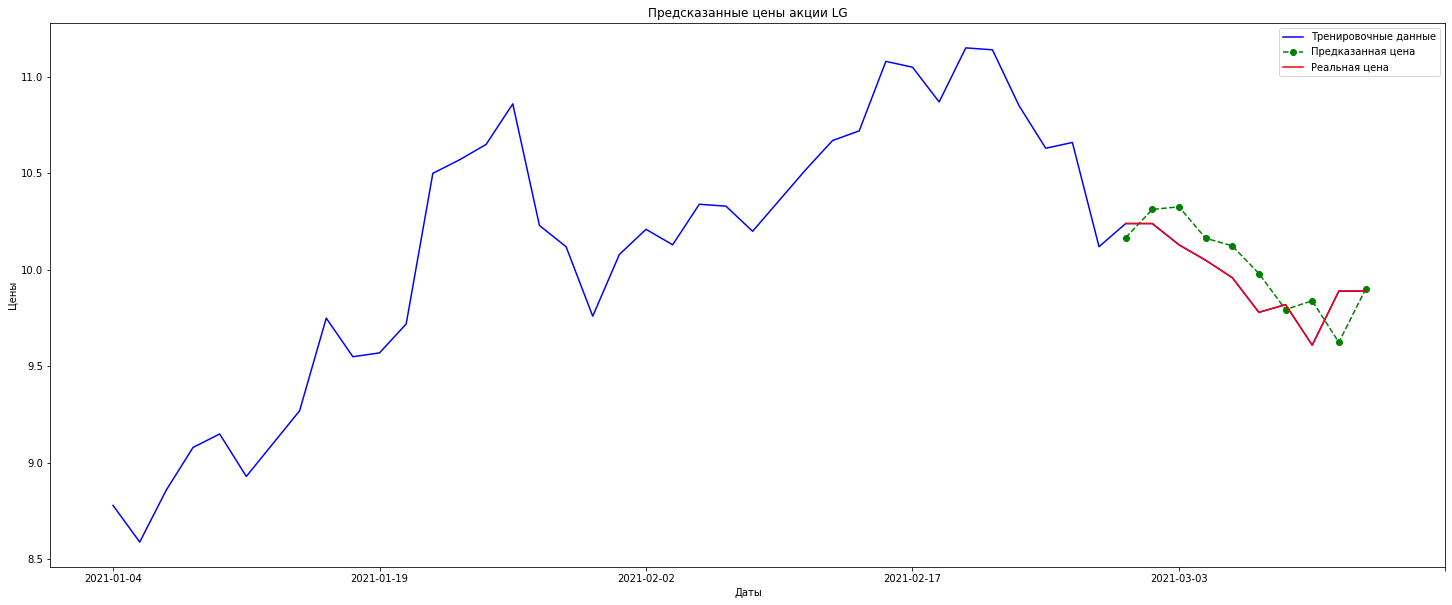

In [ ]:
plt.figure(figsize = (25, 10))
plt.plot(df['Open'], 'green', color = 'blue', label = 'Тренировочные данные') # Обучающие данные
plt.plot(test_data.index, predictions, color = 'green', marker = 'o', 
         linestyle = 'dashed', label = 'Предказанная цена') # Предсказания модели
plt.plot(test_data.index, test_data['Open'], color = 'red', label = 'Реальная цена') # Реальные тестовые данные
plt.title('Предсказанные цены акции LG') 
plt.xlabel('Даты')
plt.ylabel('Цены')
plt.xticks(np.arange(0, 60, 10), df['Date'][0:60:10]) # Зададим даты как подписи оси X
plt.legend() # Отобразим легенду диаграммы